# Restaurant Investment Opportunities in Bangalore 

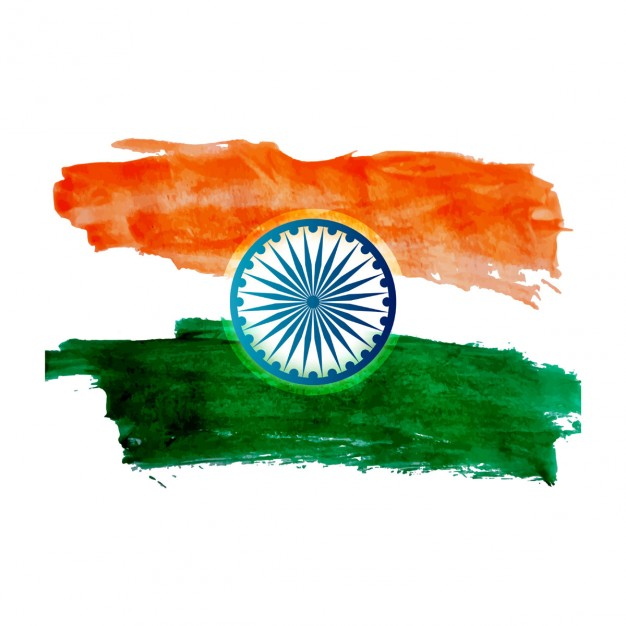

In [26]:
from IPython.display import Image
Image(filename='india.jpg')

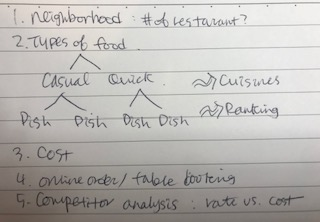

In [27]:
Image(filename='thinking process1.jpg')

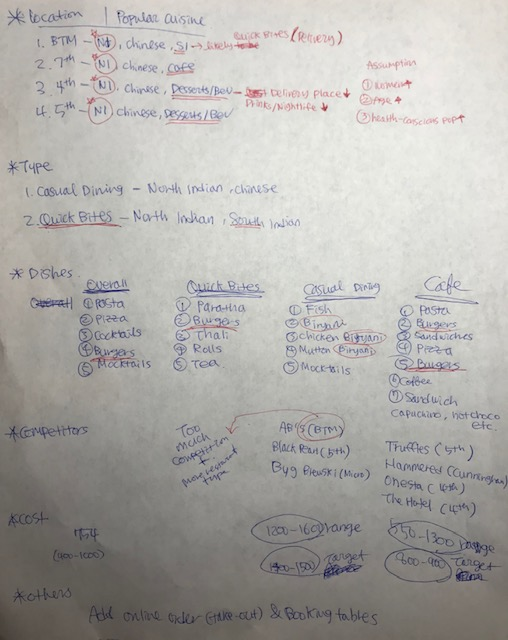

In [28]:
Image(filename='thinking process2.jpg')

### Introduction

Bengaluru (also called Bangalore) is the capital of India's southern Karnataka state. It’s third largest city in India and widely recognized as one of India’s the biggest tech hubs. Bangalore has experienced a dramatic social and cultural change with the advent of the liberalization and expansion of the information technology and business process outsourcing industries in India. IT companies in Bangalore employ over 35% of India's pool of 1 million IT professionals. 
Although the city is known to many as the Silicon Valley of India, Bangalore can also be called a foodie's paradise because of its vast variety of foods and edibles with a touch of Bangalore's uniqueness and tradition. Because the city is a cultural hub with a rich blend of peoples from around India and the world, this cultural diversity has enlivened the city’s restaurant scene; analyzing the restaurant scene in Bangalore will provide business solutions.

### Contents

Since Bangalore is historically a multicultural city, the food culture of Bangalore is quite diverse. The dataset from Zomato, an Indian restaurant search and discovery service, contains a variety of information including different types of cuisine, reviews, rating and more. Even though there's an overwhelming demand of restaurants, it is important to analyze the demography and overall food trend in different areas to win a competition. This analysis will suggest the best strategy regarding opening restaurant chain in Bangalore. 

There are total 17 columns and each of them indicates below:

1. url: the url of the restaurant in the zomato website

2. address: the address of the restaurant in Bengaluru

3. name: the name of the restaurant

4. online_order: whether online ordering is available in the restaurant or not

5. book_table: table book option available or not

6. rate: the overall rating of the restaurant out of 5

7. votes: total number of rating for the restaurant as of the above mentioned date

8. phone: the phone number of the restaurant

9. location: the neighborhood in which the restaurant is located

10. rest_type: restaurant type

11. dish_liked: dishes people liked in the restaurant

12. cuisines: food styles, separated by comma

13. approx_cost(for two people): the approximate cost for meal for two people

14. reviews_list: list of tuples containing reviews for the restaurant, each tuple

15. menu_item: list of menus available in the restaurant

16. listed_in(type): type of meal

17. listed_in(city): the neighborhood in which the restaurant is listed

In [5]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [2]:
# read the file 
df = pd.read_csv(r'C:\Users\user\Desktop\Capstone Summer 19\zomato-bangalore-restaurants\zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [3]:
df.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
url                            51717 non-null object
address                        51717 non-null object
name                           51717 non-null object
online_order                   51717 non-null object
book_table                     51717 non-null object
rate                           43942 non-null object
votes                          51717 non-null int64
phone                          50509 non-null object
location                       51696 non-null object
rest_type                      51490 non-null object
dish_liked                     23639 non-null object
cuisines                       51672 non-null object
approx_cost(for two people)    51371 non-null object
reviews_list                   51717 non-null object
menu_item                      51717 non-null object
listed_in(type)                51717 non-null object
listed_in(city)                51717 non-nul

### 1. Cleaning the data

In [5]:
# change some of the names of columns which are confusing
df.rename(columns={'approx_cost(for two people)': 'average_cost', 'listed_in(city)': 'locality','listed_in(type)': 'restaurant_type'}, inplace=True)
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [6]:
# convert the string to float for rating and get rid of unnecessary punctuation like slash
df.rate = df.rate.replace("NEW", np.nan)
df.dropna(how ='any', inplace = True)

df.rate = df.rate.astype(str)
df.rate = df.rate.apply(lambda df: df.replace('/5',''))
df.rate = df.rate.apply(lambda df: float(df))
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [7]:
# drop some columns that won't contribute to generate insights such as url and phone number
df2 = df.drop(columns=['url','phone'])
df2.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [8]:
# remove comma for the average_cost and change a datatype to float
k = df2.average_cost.apply(lambda df2: df2.replace(',',''))
df2.average_cost = df2.average_cost.apply(lambda k: k.replace(',',''))
df2.average_cost = df2.average_cost.apply(lambda df2: float(df2))
df2

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600.0,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari
7,"2469, 3rd Floor, 24th Cross, Opposite BDA Comp...",Onesta,Yes,Yes,4.6,2556,Banashankari,"Casual Dining, Cafe","Farmhouse Pizza, Chocolate Banana, Virgin Moji...","Pizza, Cafe, Italian",600.0,"[('Rated 5.0', 'RATED\n I personally really l...",[],Cafes,Banashankari
8,"1, 30th Main Road, 3rd Stage, Banashankari, Ba...",Penthouse Cafe,Yes,No,4.0,324,Banashankari,Cafe,"Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...","Cafe, Italian, Continental",700.0,"[('Rated 3.0', ""RATED\n I had been to this pl...",[],Cafes,Banashankari
9,"2470, 21 Main Road, 25th Cross, Banashankari, ...",Smacznego,Yes,No,4.2,504,Banashankari,Cafe,"Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...","Cafe, Mexican, Italian, Momos, Beverages",550.0,"[('Rated 4.0', ""RATED\n Easy to locate\nVFM 3...",[],Cafes,Banashankari
10,"12,29 Near PES University Back Gate, D'Souza N...",CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ© Down The A...,Yes,No,4.1,402,Banashankari,Cafe,"Waffles, Pasta, Crispy Chicken, Honey Chilli C...",Cafe,500.0,"[('Rated 4.0', 'RATED\n We ended up here on a...",[],Cafes,Banashankari


In [9]:
# check if all the datatypes are changed correctly
df2.dtypes

address             object
name                object
online_order        object
book_table          object
rate               float64
votes                int64
location            object
rest_type           object
dish_liked          object
cuisines            object
average_cost       float64
reviews_list        object
menu_item           object
restaurant_type     object
locality            object
dtype: object

### 2. Exploratory data analysis

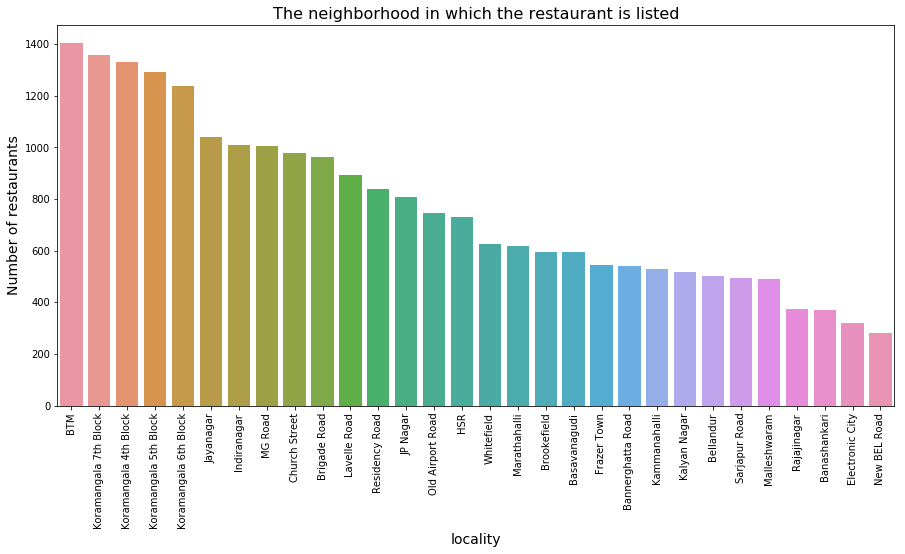

In [10]:
# the neighborhood in which the restaurant is listed
loc = df2['locality'].value_counts()

plt.figure(figsize=(15,7))
sns.barplot(loc.index, loc.values, alpha=1)
plt.xticks(rotation='vertical')
plt.xlabel('locality', fontsize=14)
plt.ylabel('Number of restaurants', fontsize=14)
plt.title("The neighborhood in which the restaurant is listed", fontsize=16)
plt.show()

* BTM (Bommanhalli, Tavarekere and Madiwala) is the neighborhood where has the highest number of the restaurants. BTM is the most foodie place. 

Text(0.5, 0, 'count')

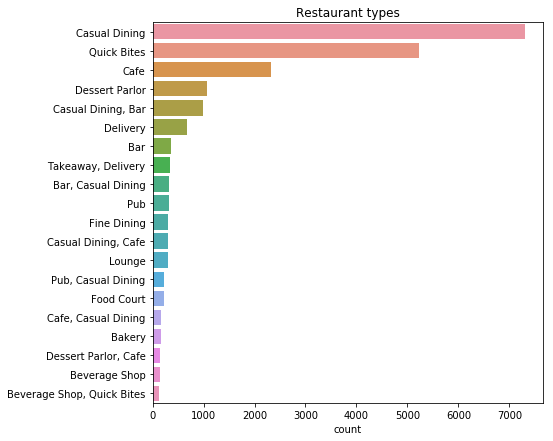

In [11]:
# restaurant types
plt.figure(figsize=(7,7))
rest=df2['rest_type'].value_counts()[:20]
sns.barplot(rest,rest.index)
plt.title("Restaurant types")
plt.xlabel("count")

In [12]:
rest

Casual Dining                 7298
Quick Bites                   5224
Cafe                          2321
Dessert Parlor                1074
Casual Dining, Bar             980
Delivery                       667
Bar                            357
Takeaway, Delivery             341
Bar, Casual Dining             328
Pub                            325
Fine Dining                    312
Casual Dining, Cafe            302
Lounge                         298
Pub, Casual Dining             217
Food Court                     217
Cafe, Casual Dining            159
Bakery                         157
Dessert Parlor, Cafe           143
Beverage Shop                  138
Beverage Shop, Quick Bites     134
Name: rest_type, dtype: int64

In [65]:
rest.values / rest.values.sum()

array([0.34765625, 0.24885671, 0.11056593, 0.05116235, 0.04668445,
       0.03177401, 0.01700648, 0.01624428, 0.015625  , 0.01548209,
       0.0148628 , 0.01438643, 0.01419588, 0.01033727, 0.01033727,
       0.00757431, 0.00747904, 0.00681212, 0.00657393, 0.00638338])

* Casual Dining is the most popular type of restaurant. Because Banglore is known as the tech capital of India, people probably prefer Quick Bites when they live in a busy life.

Text(0.5, 0, 'count')

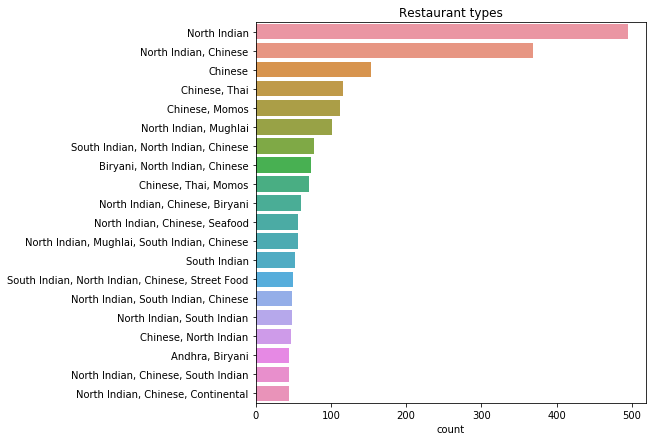

In [13]:
# dig into top 2 types: Casual Dining and Quick Bites
#1. Cuisines for Casual Dining
casual_rest=df2[df2['rest_type']=='Casual Dining']

plt.figure(figsize=(7,7))
r=casual_rest['cuisines'].value_counts()[:20]
sns.barplot(r,r.index)
plt.title("Restaurant types")
plt.xlabel("count")

Text(0.5, 0, 'count')

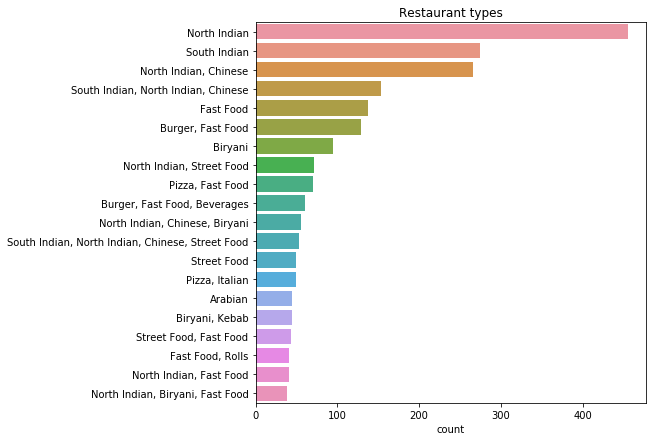

In [92]:
# dig into top 2 types: Casual Dining and Quick Bites
#2. Cuisines for Quick Bites
quick_rest=df2[df2['rest_type']=='Quick Bites']

plt.figure(figsize=(7,7))
r2=quick_rest['cuisines'].value_counts()[:20]
sns.barplot(r2,r2.index)
plt.title("Restaurant types")
plt.xlabel("count")

* Regardless the types of the restaurant, North Indian is the most popular cuisine in the city. South Indian is popular for Quick Bites but not for Casual Dining. Hence, opening a Casual Dining restaurant for South Indian foods is not recommended. 

In [15]:
# dig into popular cuisines for top 4 locations
#1. BTM
hh=df2[df2['locality']=='BTM']

df_lc=hh.groupby(['locality','cuisines']).agg('count')
df3=df_lc.sort_values(['cuisines'],ascending=False).groupby(['locality'],
                as_index=False).apply(lambda x : x.sort_values(by="location",ascending=False).head(3))['rate'].reset_index().rename(columns={'rate':'count'})

df3

,level_0,locality,cuisines,count
0,0,BTM,North Indian,77
1,0,BTM,"North Indian, Chinese",58
2,0,BTM,"South Indian, North Indian, Chinese",21


In [16]:
#2. Koramangala 7th Block
kk=df2[df2['locality']=='Koramangala 7th Block']

df_lc=kk.groupby(['locality','cuisines']).agg('count')
df3=df_lc.sort_values(['cuisines'],ascending=False).groupby(['locality'],
                as_index=False).apply(lambda x : x.sort_values(by="location",ascending=False).head(3))['rate'].reset_index().rename(columns={'rate':'count'})

df3

,level_0,locality,cuisines,count
0,0,Koramangala 7th Block,North Indian,77
1,0,Koramangala 7th Block,"North Indian, Chinese",40
2,0,Koramangala 7th Block,Cafe,21


In [17]:
#3. Koramangala 4th Block
qq=df2[df2['locality']=='Koramangala 4th Block']

df_lc=qq.groupby(['locality','cuisines']).agg('count')
df3=df_lc.sort_values(['cuisines'],ascending=False).groupby(['locality'],
                as_index=False).apply(lambda x : x.sort_values(by="location",ascending=False).head(3))['rate'].reset_index().rename(columns={'rate':'count'})

df3

,level_0,locality,cuisines,count
0,0,Koramangala 4th Block,North Indian,73
1,0,Koramangala 4th Block,"North Indian, Chinese",32
2,0,Koramangala 4th Block,"Desserts, Beverages",17


In [18]:
#4. Koramangala 5th Block
gg=df2[df2['locality']=='Koramangala 5th Block']

df_lc=gg.groupby(['locality','cuisines']).agg('count')
df3=df_lc.sort_values(['cuisines'],ascending=False).groupby(['locality'],
                as_index=False).apply(lambda x : x.sort_values(by="location",ascending=False).head(3))['rate'].reset_index().rename(columns={'rate':'count'})

df3

,level_0,locality,cuisines,count
0,0,Koramangala 5th Block,North Indian,75
1,0,Koramangala 5th Block,"North Indian, Chinese",38
2,0,Koramangala 5th Block,"Desserts, Beverages",18


* BTM is not only top area where have the highest number of the restaurants but also where 'North Indian' ranked on all top 3. From the finding earlier which is South Indian is only popular for Quick Bites not for Casual Dining, South Indian places in BTM are more likely to be Quick Bites places. Interesting fact is that Koramangala 7th Block is the most popular place for Cafe among top 4 areas and 4th and 5th blocks also have high number of desserts and beverages places. It is clear that the percentage of the cafe or cafe-like restaurants in Koramangala is higher than in BTM.  

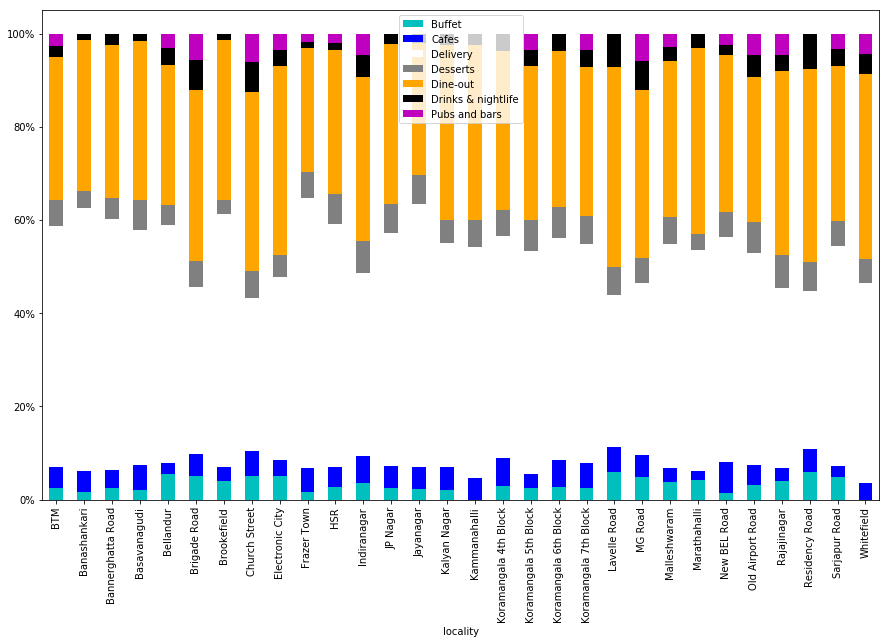

In [78]:
# location versus meal_type
plt.rcParams['figure.figsize'] = 15,9;
df2.groupby(['locality','restaurant_type']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).\
unstack().plot(kind='bar',stacked=True,color=['c','b','w','grey','orange','black','m'])
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter())
plt.legend(loc='best');

* There is higher rate of Delivery for BTM, which is not surprising because South Indian places in BTM are more likely to be Quick Bites. And the most frequent type of the restaurants for delivery are Quick Bites. Since Koramangala 4th Block has the highest number of Cafe, this area has lowest number of places for Drinks and Nightlife. People in Koramangala 4th Block are more likely go to Cafe than Pubs and bars. Some assumptions could be:

    1. There might be more women live in Koramangala 4th Block.
    2. People in Koramangala 4th Block are more likely health-conscious because of less drinking phenomenon.
    3. The average age might be higher in Koramangala 4th Block: the older, the less going out.

In [20]:
# most liked dishes of Bangalore
import re
df2_dish=df2[df2['dish_liked'].notnull()]
df2_dish.index=range(df2_dish.shape[0])
likes=[]
for i in range(df2_dish.shape[0]):
    splited_array=re.split(',',df2_dish['dish_liked'][i])
    for item in splited_array:
        likes.append(item)

In [21]:
print("Count of Most liked dishes of Bangalore")
fav_food = pd.Series(likes).value_counts()
fav_food.head(20)

Count of Most liked dishes of Bangalore


 Pasta              2650
 Pizza              1903
 Cocktails          1863
 Burgers            1724
 Mocktails          1585
 Biryani            1308
 Sandwiches         1281
Burgers             1239
 Coffee             1155
 Nachos             1153
 Fish               1116
 Paratha            1097
 Salads             1038
 Chicken Biryani    1002
Cocktails            891
 Fries               875
 Mutton Biryani      832
 Beer                827
 Noodles             821
 Tea                 800
dtype: int64

In [22]:
# most liked dishes for Quick Bites
quick_rest.index=range( quick_rest.shape[0])
likes=[]
for i in range(quick_rest.shape[0]):
    splited_array=re.split(',',quick_rest['dish_liked'][i])
    for item in splited_array:
        likes.append(item)

In [23]:
fav_food_q = pd.Series(likes).value_counts()
fav_food_q.head(20)

 Paratha            488
Burgers             396
 Thali              332
Rolls               307
 Tea                293
Paratha             273
 Masala Dosa        272
 Roti               265
 Biryani            260
 Fries              239
 Rolls              225
 Filter Coffee      221
 Lassi              207
 Chaat              206
 Coffee             206
Masala Dosa         202
 Vada               192
 Panipuri           181
 Chicken Biryani    179
 Idli               175
dtype: int64

In [24]:
# most liked dishes for Casual Dining
casual_rest.index=range(casual_rest.shape[0])
likes=[]
for i in range(casual_rest.shape[0]):
    splited_array=re.split(',',casual_rest['dish_liked'][i])
    for item in splited_array:
        likes.append(item)

In [25]:
fav_food_cr = pd.Series(likes).value_counts()
fav_food_cr.head(20)

 Fish                 669
 Biryani              656
 Chicken Biryani      613
 Mutton Biryani       612
 Mocktails            504
 Pasta                495
 Butter Chicken       461
 Salads               423
Noodles               404
 Vegetable Biryani    397
 Tandoori Chicken     384
Biryani               384
 Chicken Curry        361
 Noodles              357
 Sea Food             356
 Roti                 345
 Paratha              341
 Thali                330
 Dal Makhani          320
 Momos                314
dtype: int64

In [26]:
# most liked dishes for Cafe
cafe_rest=df2[df2['rest_type']=='Cafe']

cafe_rest.index=range(cafe_rest.shape[0])
likes=[]
for i in range(cafe_rest.shape[0]):
    splited_array=re.split(',',cafe_rest['dish_liked'][i])
    for item in splited_array:
        likes.append(item)

In [27]:
fav_food_cafe = pd.Series(likes).value_counts()
fav_food_cafe.head(20)

 Pasta            902
 Burgers          631
 Sandwiches       506
 Pizza            417
Burgers           376
Coffee            346
 Sandwich         316
 Coffee           312
 Fries            298
 Nachos           285
 Hot Chocolate    235
 Pancakes         209
 Cappuccino       209
 Waffles          199
 Tea              191
 Salads           187
Pizza             177
Pasta             165
 Salad            151
 Brownie          149
dtype: int64

In [28]:
# most liked dishes for each areas
from collections import Counter
loc_dish = df2.groupby('locality')['dish_liked'].value_counts()
ind = loc_dish.index.levels[0]
top_dish = []
for i in ind:
    dish_counter = Counter([e.strip() for e in ','.join(loc_dish[i].index).split(',') if e])
    top_dish.append(','.join(i[0] for i in dish_counter.most_common()[:1]))

In [29]:
loc_dish_df = pd.DataFrame({'locality':ind,'top_dish':top_dish})
del top_dish
loc_dish_df

,locality,top_dish
0,BTM,Burgers
1,Banashankari,Pasta
2,Bannerghatta Road,Coffee
3,Basavanagudi,Pasta
4,Bellandur,Pasta
5,Brigade Road,Cocktails
6,Brookefield,Paratha
7,Church Street,Cocktails
8,Electronic City,Pasta
9,Frazer Town,Burgers


* It seems that a lot of neighborhood are characterised by a certain type of dish liked. But, burgers win for all top 4 areas. 

In [30]:
# all the Cafe restaurants
cafe2 = df2[df2['rest_type'].str.contains('Cafe', case=False, regex=True,na=False)].sort_values(['rate'],ascending=False)
cafe2

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
43969,"18, Ali Askar Road, Cunningham Road, Bangalore",Hammered,Yes,Yes,4.7,4841,Cunningham Road,"Pub, Cafe","Sangria, Chicken Satay, Crispy Corn, Masala Fr...","North Indian, Thai, Japanese, Continental, Cafe",1300.0,"[('Rated 5.0', 'RATED\n It is a really good p...",[],Pubs and bars,MG Road
14769,"18, Ali Askar Road, Cunningham Road, Bangalore",Hammered,Yes,Yes,4.7,4678,Cunningham Road,"Pub, Cafe","Crispy Corn, Sangria, Chicken Satay, Masala Fr...","North Indian, Thai, Japanese, Continental, Cafe",1300.0,"[('Rated 5.0', 'RATED\n Great food and the am...","['Jalapeno Cheese Bullets', 'Paneer Sufiyana T...",Delivery,Frazer Town
39391,"18, Ali Askar Road, Cunningham Road, Bangalore",Hammered,Yes,Yes,4.7,4819,Cunningham Road,"Pub, Cafe","Sangria, Chicken Satay, Crispy Corn, Masala Fr...","North Indian, Thai, Japanese, Continental, Cafe",1300.0,"[('Rated 3.0', ""RATED\n The service was reall...",[],Drinks & nightlife,Lavelle Road
43150,"18, Ali Askar Road, Cunningham Road, Bangalore",Hammered,Yes,Yes,4.7,4840,Cunningham Road,"Pub, Cafe","Sangria, Chicken Satay, Crispy Corn, Masala Fr...","North Indian, Thai, Japanese, Continental, Cafe",1300.0,"[('Rated 5.0', 'RATED\n It is a really good p...","['Jalapeno Cheese Bullets', 'Paneer Sufiyana T...",Desserts,MG Road
32152,"28, 4th 'B' Cross, Koramangala 5th Block, Bang...",Truffles,No,No,4.7,14717,Koramangala 5th Block,"Cafe, Casual Dining","Burgers, Pasta, Cocktails, American Cheese Bur...","Cafe, American, Burger, Steak",900.0,"[('Rated 2.0', ""RATED\n Overhyped ! Deserts a...",[],Cafes,Koramangala 6th Block
8341,"203, 1st Main, Koramangala 7th Block, bangalore",Lot Like Crepes,Yes,No,4.7,1022,Koramangala 7th Block,"Cafe, Dessert Parlor","Paneer Peri Peri, Pancakes, Fajitas, Sweet Cre...","Cafe, Desserts, Continental",550.0,"[('Rated 5.0', 'RATED\n If you want to try so...",[],Cafes,BTM
31066,"Shop 44, 4th B Cross Road, Koramangala 5th Blo...",ECHOES Koramangala,No,No,4.7,3215,Koramangala 5th Block,"Cafe, Casual Dining","Pasta, Mezze Platter, Momos, Pizza, Waffles, C...","Chinese, American, Continental, Italian, North...",750.0,"[('Rated 5.0', 'RATED\n A cafe with a very un...",[],Dine-out,Koramangala 5th Block
8330,"28, 4th 'B' Cross, Koramangala 5th Block, Bang...",Truffles,No,No,4.7,14654,Koramangala 5th Block,"Cafe, Casual Dining","Burgers, Pasta, Cocktails, American Cheese Bur...","Cafe, American, Burger, Steak",900.0,"[('Rated 5.0', 'RATED\n Menu is extensive and...",[],Cafes,BTM
42407,"18, Ali Askar Road, Cunningham Road, Bangalore",Hammered,Yes,Yes,4.7,4839,Cunningham Road,"Pub, Cafe","Sangria, Chicken Satay, Crispy Corn, Masala Fr...","North Indian, Thai, Japanese, Continental, Cafe",1300.0,"[('Rated 5.0', 'RATED\n It is a really good p...",[],Delivery,MG Road
36668,"28, 4th 'B' Cross, Koramangala 5th Block, Bang...",Truffles,No,No,4.7,14726,Koramangala 5th Block,"Cafe, Casual Dining","Burgers, Pasta, Cocktails, American Cheese Bur...","Cafe, American, Burger, Steak",900.0,"[('Rated 3.0', ""RATED\n Not bad but the burge...",[],Dine-out,Koramangala 7th Block


In [31]:
# top Cafe restaurants in Koramangala 4th Block to perform competitor analysis
cafe3 = cafe2[cafe2['location']=='Koramangala 4th Block'][:10].sort_values(['votes'],ascending=False)
cafe3.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
26534,"562, 8th Main, Koramangala 4th Block, Bangalore",Onesta,Yes,Yes,4.4,9064,Koramangala 4th Block,"Casual Dining, Cafe","Berryblast, Gourmet Pizza, Mocktails, Ravioli,...","Pizza, Cafe, Italian",600.0,"[('Rated 4.0', ""RATED\n One more beautiful pl...","['Nutella Chocolate Mousse', 'French Fries', '...",Cafes,Koramangala 4th Block
36674,"4, 8th Main Road, Koramangala 4th Block, Banga...",The Hole in the Wall Cafe,No,No,4.6,7137,Koramangala 4th Block,Cafe,"Waffles, Healthy Breakfast, English Breakfast,...","Cafe, American, Burger",600.0,"[('Rated 4.0', ""RATED\n Came here for breakfa...",[],Dine-out,Koramangala 7th Block
34780,"4, 8th Main Road, Koramangala 4th Block, Banga...",The Hole in the Wall Cafe,No,No,4.6,7129,Koramangala 4th Block,Cafe,"Waffles, Healthy Breakfast, English Breakfast,...","Cafe, American, Burger",600.0,"[('Rated 4.0', ""RATED\n Came here for breakfa...",[],Cafes,Koramangala 7th Block
33921,"4, 8th Main Road, Koramangala 4th Block, Banga...",The Hole in the Wall Cafe,No,No,4.6,7129,Koramangala 4th Block,Cafe,"Waffles, Healthy Breakfast, English Breakfast,...","Cafe, American, Burger",600.0,"[('Rated 4.0', ""RATED\n Came here for breakfa...",[],Dine-out,Koramangala 6th Block
32153,"4, 8th Main Road, Koramangala 4th Block, Banga...",The Hole in the Wall Cafe,No,No,4.6,7127,Koramangala 4th Block,Cafe,"Waffles, Healthy Breakfast, English Breakfast,...","Cafe, American, Burger",600.0,"[('Rated 4.0', ""RATED\n Came here for breakfa...",[],Cafes,Koramangala 6th Block


* Many top Cafe restaurants are located either 5th Block or 7th Block and there are not many top restaurants where highly rated and more reviews in Koramangala 4th Block. There might be less competition while there's a high demand for Cafe restaurant in that area. The restaurant 'Onesta' would be main competitor in Koramangala 4th Block and some other restaurants like Hammered and Truffles can be good ones to benchmark. 

In [32]:
# all the North Indian food serving restaurants
nif = df2[df2['cuisines'].str.contains('North Indian', case=False, regex=True,na=False)]
nif.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
5,"37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...",Timepass Dinner,Yes,No,3.8,286,Basavanagudi,Casual Dining,"Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...",North Indian,600.0,"[('Rated 3.0', 'RATED\n Food 3/5\nAmbience 3/...",[],Buffet,Banashankari


In [33]:
# top North Indian food serving restaurants where the rate is above 4.9 and votes are high to perform competitor analysis
nif2 = nif[nif['rate']>=4.9][:10].sort_values(by=['votes'], ascending=False)
nif2.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
3921,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...",1600.0,"[('Rated 5.0', 'RATED\n I have been to this p...",[],Delivery,Bellandur
4801,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...",1600.0,"[('Rated 5.0', 'RATED\n I have been to this p...","['Creamy Mushroom and Truffle Soup', 'Kung Pao...",Dine-out,Bellandur
4944,"Behind MK Retail, Sarjapur Road, Bangalore",Byg Brewski Brewing Company,Yes,Yes,4.9,16345,Sarjapur Road,Microbrewery,"Cocktails, Dahi Kebab, Rajma Chawal, Butter Ch...","Continental, North Indian, Italian, South Indi...",1600.0,"[('Rated 5.0', 'RATED\n I have been to this p...","['Creamy Mushroom and Truffle Soup', 'Kung Pao...",Drinks & nightlife,Bellandur
21279,"100 Feet Road, 1st Phase, Near Jayadeva Flyove...",AB's - Absolute Barbecues,No,Yes,4.9,6452,BTM,Casual Dining,"Tangdi Chicken, Bbq Buffet, Chocolate Icecream...","European, Mediterranean, North Indian, BBQ",1600.0,"[('Rated 5.0', 'RATED\n Undoubtedly the best ...",[],Dine-out,Jayanagar
19393,"100 Feet Road, 1st Phase, Near Jayadeva Flyove...",AB's - Absolute Barbecues,No,Yes,4.9,6404,BTM,Casual Dining,"Tangdi Chicken, Bbq Buffet, Chocolate Icecream...","European, Mediterranean, North Indian, BBQ",1600.0,"[('Rated 5.0', ""RATED\n Best place for buffet...",[],Buffet,Jayanagar


In [91]:
# top North Indian food serving restaurants in BTM
nif[nif['locality']=='BTM'][:5].sort_values(['rate'],ascending=False)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
8260,"100 Feet Road, 1st Phase, Near Jayadeva Flyove...",AB's - Absolute Barbecues,No,Yes,4.9,6375,BTM,Casual Dining,"Tangdi Chicken, Bbq Buffet, Chocolate Icecream...","European, Mediterranean, North Indian, BBQ",1600.0,"[('Rated 5.0', 'RATED\n We liked the place a ...",[],Buffet,BTM
8261,"C K Emerald, Opposite Yes Bank, BTM Layout, Ba...",The Globe Grub,No,Yes,4.4,201,BTM,Casual Dining,"Prawn, Shahi Tukda, Barfi, Veg Mushroom, Pizza...","Continental, North Indian, Asian, Italian",1300.0,"[('Rated 4.0', 'RATED\n The globe grub the am...",[],Buffet,BTM
8263,"5th Floor, CPR Tower, 100 Feet Ring Road, 1st ...","3B's - Buddies, Bar & Barbecues",No,Yes,4.4,1149,BTM,"Casual Dining, Bar","Paan Ice Cream, Cocktails, Fish Grill, Crispy ...","North Indian, Mediterranean, European, BBQ",1100.0,"[('Rated 1.0', 'RATED\n Worst buffet dinner I...",[],Buffet,BTM
8262,"6, Krishna Nagar Industrial Area, Behind Forum...",Punjabi by Nature 2.0,Yes,Yes,4.2,3230,BTM,"Casual Dining, Microbrewery","Paneer Tikki, Mutton Raan, Mango Margarita, Cr...",North Indian,1600.0,"[('Rated 3.0', ""RATED\n It has a beautiful am...",[],Buffet,BTM
8264,"84, Hosur Main Road, Madivala, BTM, Bangalore",Savoury Restaurant,Yes,No,3.9,420,BTM,Casual Dining,"Shawarma, Bamboo Biryani, Chicken Shawarama, C...","Arabian, North Indian, Chinese, Fast Food",800.0,"[('Rated 4.0', 'RATED\n my review 11th januar...",[],Buffet,BTM


In [35]:
# top North Indian food serving restaurants in Koramangala 7th Block
nif[nif['locality']=='Koramangala 7th Block'][:5].sort_values(['rate'],ascending=False)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
34724,"105, 1st A Cross Road, Jyothi Nivas College Ro...",The Black Pearl,No,Yes,4.7,10541,Koramangala 5th Block,"Casual Dining, Bar","Chocolate Lollipop, Chocolate Biscuit, Fire Sh...","North Indian, European, Mediterranean",1400.0,"[('Rated 5.0', 'RATED\n Amazing experience am...",[],Buffet,Koramangala 7th Block
34727,"1, SJR Primus, Adjacent Raheja Arcade, Koraman...",Punjab Bistro,Yes,Yes,4.4,459,Koramangala 7th Block,"Casual Dining, Bar","Chicken Shorba, Paneer Tikka Masala, Cocktails...",North Indian,1500.0,"[('Rated 4.0', 'RATED\n I had been to this fi...","['Murgh Kali Mirch ka Shorba', 'Tandoori Brocc...",Buffet,Koramangala 7th Block
34729,"2nd Floor, Forum Mall, Koramangala 7th Block, ...",Salt - Indian Restaurant Bar & Grill,Yes,Yes,4.4,684,Koramangala 7th Block,Casual Dining,"Dahi Kebab, Lamb, Mocktails, Lassi, Vegetable ...","North Indian, Mughlai, Biryani",1500.0,"[('Rated 5.0', 'RATED\n Great food and even b...","['Salts Special Dal Makhani', 'Dal Tadka', 'Mu...",Buffet,Koramangala 7th Block
34725,"105, 1st Main, KHB Colony, Jyothi Nivas Colleg...",Boho,No,Yes,4.2,1760,Koramangala 5th Block,Casual Dining,"Barbecue Chicken Wings, Cocktails, Chilli Pane...","Continental, Asian, American, North Indian, De...",1200.0,"[('Rated 5.0', 'RATED\n Great Ambience with p...",[],Buffet,Koramangala 7th Block
34730,"4, 20th Main Road, Koramangala 7th Block, Bang...",Saara's Cafe - SS Lumina Hotel,No,Yes,4.2,117,Koramangala 7th Block,Casual Dining,"Baklava, Mutton Biryani, Salad, Rice Pudding, ...","North Indian, South Indian, Chinese, Arabian",800.0,"[('Rated 4.0', ""RATED\n A Cafe in SS Lumina H...",[],Buffet,Koramangala 7th Block


In [36]:
# top North Indian food serving restaurants in Koramangala 4th Block
nif[nif['locality']=='Koramangala 4th Block'][:5].sort_values(['rate'],ascending=False)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
26488,"105, 1st A Cross Road, Jyothi Nivas College Ro...",The Black Pearl,No,Yes,4.7,10471,Koramangala 5th Block,"Casual Dining, Bar","Chocolate Lollipop, Chocolate Biscuit, Fire Sh...","North Indian, European, Mediterranean",1400.0,"[('Rated 4.0', ""RATED\n Everything was fine h...",[],Buffet,Koramangala 4th Block
26486,"BluPetal Hotel, 60 Jyoti Nivas College Road, K...",Sultans of Spice,Yes,Yes,4.5,3468,Koramangala 5th Block,Casual Dining,"Jeera Rice, Mutton Chops, Chicken Salad, Veget...","North Indian, Mughlai, Salad",1300.0,"[('Rated 4.0', 'RATED\n On weekday lunch time...",[],Buffet,Koramangala 4th Block
26487,"60, Jyothi Nivas College Road, Koramangala 5th...",Buff Buffet Buff,Yes,Yes,4.5,3156,Koramangala 5th Block,"Casual Dining, Bar","Egg Chilli, Butter Naan, Watermelon Juice, Cho...","North Indian, Chinese, Continental, Thai, Salad",1500.0,"[('Rated 5.0', ""RATED\n Buff buffet buff they...",[],Buffet,Koramangala 4th Block
26491,"32, 80 Feet Road, 4th Block, Koramangala 4th B...",Banjara Melting Pot,Yes,Yes,4.2,767,Koramangala 4th Block,Casual Dining,"Mocktails, Dal Tadka, Paneer Lababdar, Stuffed...","North Indian, Chinese, Seafood",1700.0,"[('Rated 4.0', 'RATED\n Went this place on a ...",[],Buffet,Koramangala 4th Block
26492,"Halcyon Condominiums, 9, Drafadilla Layout, Ko...",Cilantro,Yes,Yes,4.0,281,Koramangala 4th Block,"Casual Dining, Bar","Biryani, Breakfast Buffet, Fish, Salads, Burge...","European, American, Continental, North Indian,...",1500.0,"[('Rated 4.0', 'RATED\n Cilantro had been a d...",[],Buffet,Koramangala 4th Block


In [37]:
# top North Indian food serving restaurants in Koramangala 5th Block
nif[nif['locality']=='Koramangala 5th Block'][:5].sort_values(['rate'],ascending=False)

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,average_cost,reviews_list,menu_item,restaurant_type,locality
29265,"105, 1st A Cross Road, Jyothi Nivas College Ro...",The Black Pearl,No,Yes,4.7,10512,Koramangala 5th Block,"Casual Dining, Bar","Chocolate Lollipop, Chocolate Biscuit, Fire Sh...","North Indian, European, Mediterranean",1400.0,"[('Rated 5.0', 'RATED\n Amazing experience am...",[],Buffet,Koramangala 5th Block
29269,"60, Jyothi Nivas College Road, Koramangala 5th...",Buff Buffet Buff,Yes,Yes,4.5,3163,Koramangala 5th Block,"Casual Dining, Bar","Egg Chilli, Butter Naan, Watermelon Juice, Cho...","North Indian, Chinese, Continental, Thai, Salad",1500.0,"[('Rated 5.0', ""RATED\n Buff buffet buff they...",[],Buffet,Koramangala 5th Block
29270,"BluPetal Hotel, 60 Jyoti Nivas College Road, K...",Sultans of Spice,Yes,Yes,4.5,3467,Koramangala 5th Block,Casual Dining,"Jeera Rice, Mutton Chops, Chicken Salad, Veget...","North Indian, Mughlai, Salad",1300.0,"[('Rated 4.0', 'RATED\n On weekday lunch time...",[],Buffet,Koramangala 5th Block
29266,"105, 1st Main, KHB Colony, Jyothi Nivas Colleg...",Boho,No,Yes,4.2,1754,Koramangala 5th Block,Casual Dining,"Barbecue Chicken Wings, Cocktails, Chilli Pane...","Continental, Asian, American, North Indian, De...",1200.0,"[('Rated 5.0', 'RATED\n Awesome place with go...",[],Buffet,Koramangala 5th Block
29272,"103, Industrial Area, 5th Block, Near Jyothi N...",Empire Restaurant,Yes,No,4.1,6943,Koramangala 5th Block,Casual Dining,"Brain Fry, Non Veg Thali, Peri Peri Chicken, E...","North Indian, Mughlai, South Indian, Chinese",750.0,"[('Rated 5.0', 'RATED\n Empire does it again....",[],Buffet,Koramangala 5th Block


* In BTM area, AB's - Absolute Barbecues is the top restaurant that beat all the others restaurant in that area. It not only has an exceptional rate for review but also has the highest number of reviews. Since it's a Buffet, it doesn't offer delivery service. Regardless the location, people in Bangalore love Buffet because all the top restaurants in top areas are all Buffet-type. The black pearl is the top restaurant in Koramangala area and it is similar concept of the restaurant as AB's - Absolute Barbecues. 

In [38]:
df2.describe()

,rate,votes,average_cost
count,23046.000000,23046.000000,23046.000000
mean,3.904383,604.908444,754.299662
std,0.426365,1117.367014,521.538416
min,1.800000,0.000000,40.000000
25%,3.800000,103.000000,400.000000
50%,4.000000,224.000000,600.000000
75%,4.200000,591.000000,1000.000000
max,4.900000,16832.000000,6000.000000


Text(0.5, 1.0, 'Cost of Restuarant')

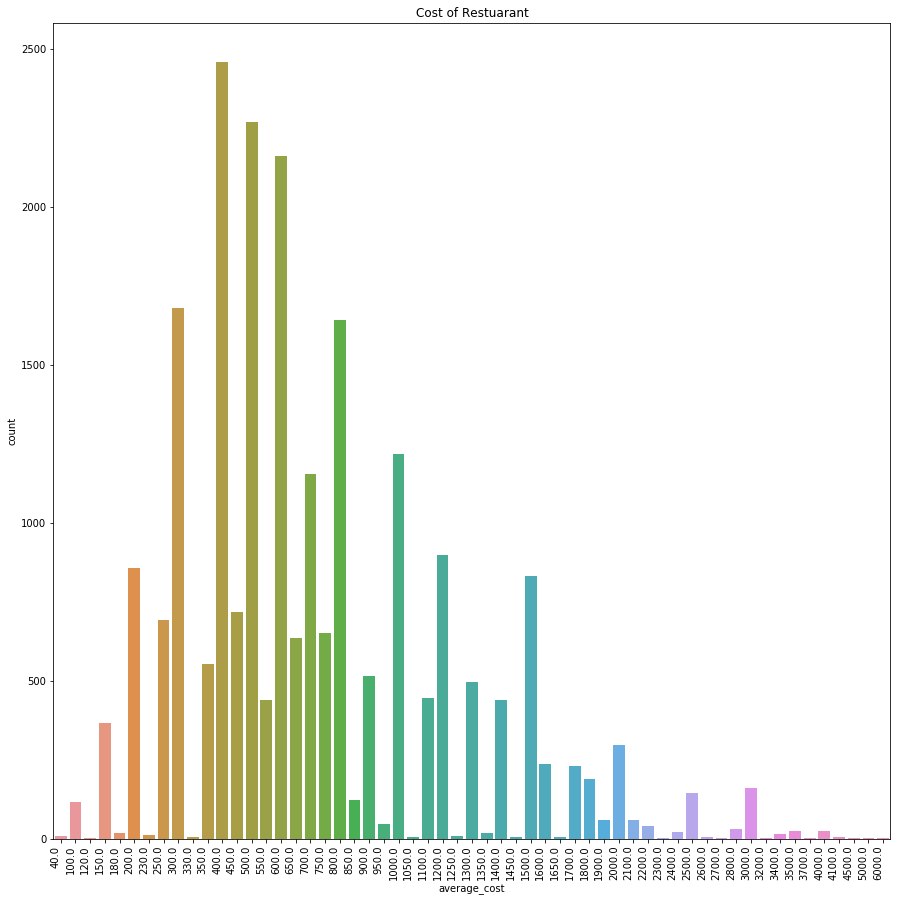

In [39]:
# cost of restuarant - overall
sns.countplot(df2['average_cost'])
sns.countplot(df2['average_cost']).set_xticklabels(sns.countplot(df2['average_cost']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(15,15)
plt.title('Cost of Restuarant')

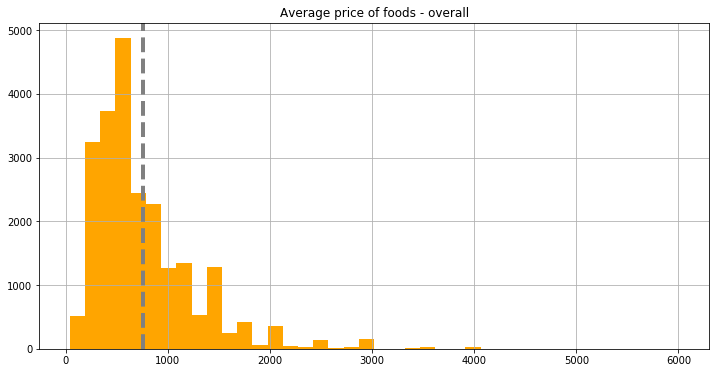

In [40]:
# cost of restuarant - overall
plt.figure(figsize=(12,6))
df2.average_cost.hist(bins=40,color='orange')
plt.axvline(df2.average_cost.mean(), color='grey', linestyle='dashed', linewidth=4)
plt.title('Average price of foods - overall')
plt.show()

In [41]:
# average cost for two people in all restaurants 
df2['average_cost'].mean()

754.2996615464723

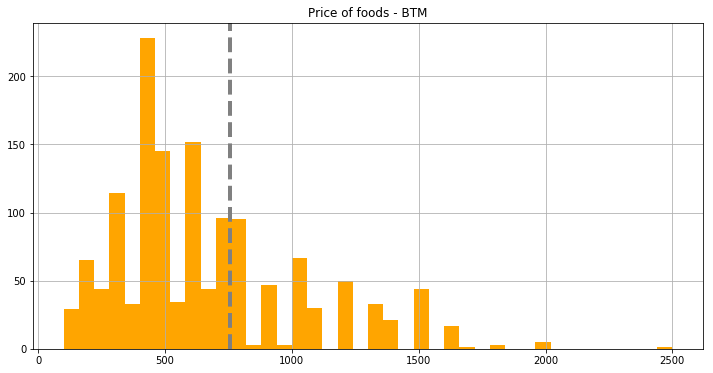

In [42]:
# cost of restuarant - BTM
plt.figure(figsize=(12,6))
df2[(df2['locality']=='BTM')].average_cost.hist(bins=40,color='orange')
plt.axvline(df2.average_cost.mean(), color='grey', linestyle='dashed', linewidth=4)
plt.title('Price of foods - BTM')
plt.show()

In [43]:
# average cost for two people in BTM
costBTM = df2[df2['locality']=='BTM']
costBTM['average_cost'].mean()

652.0512820512821

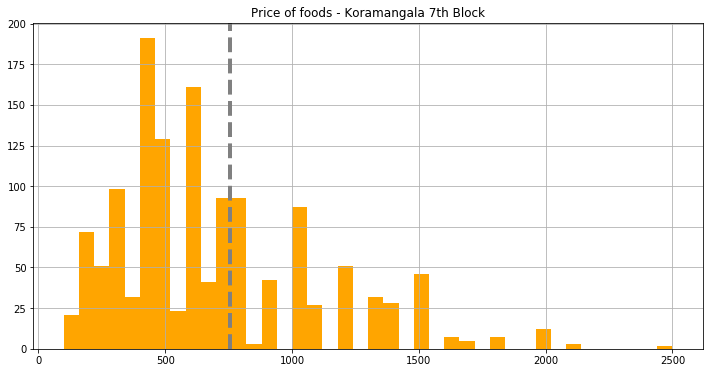

In [44]:
# cost of restuarant - Koramangala 7th Block
plt.figure(figsize=(12,6))
df2[(df2['locality']=='Koramangala 7th Block')].average_cost.hist(bins=40,color='orange')
plt.axvline(df2.average_cost.mean(), color='grey', linestyle='dashed', linewidth=4)
plt.title('Price of foods - Koramangala 7th Block')
plt.show()

In [45]:
# average cost for two people in Koramangala 7th Block
costBTM = df2[df2['locality']=='Koramangala 7th Block']
costBTM['average_cost'].mean()

682.5792188651437

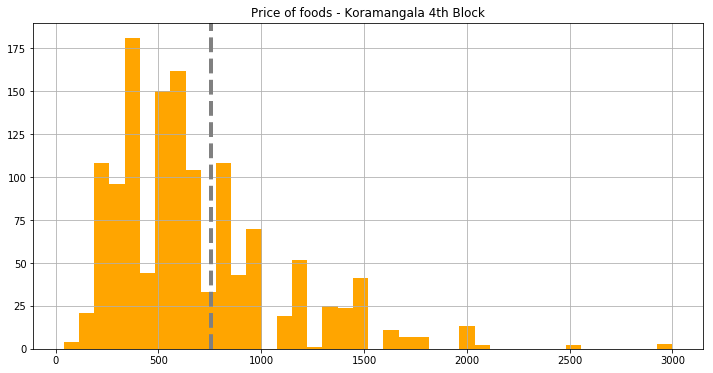

In [46]:
# cost of restuarant - Koramangala 4th Block
plt.figure(figsize=(12,6))
df2[(df2['locality']=='Koramangala 4th Block')].average_cost.hist(bins=40,color='orange')
plt.axvline(df2.average_cost.mean(), color='grey', linestyle='dashed', linewidth=4)
plt.title('Price of foods - Koramangala 4th Block')
plt.show()

In [47]:
# average cost for two people in Koramangala 4th Block
costBTM = df2[df2['locality']=='Koramangala 4th Block']
costBTM['average_cost'].mean()

683.0578512396694

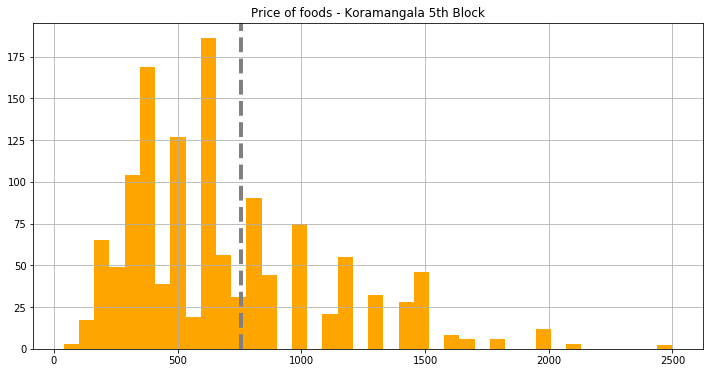

In [48]:
# cost of restuarant - Koramangala 5th Block
plt.figure(figsize=(12,6))
df2[(df2['locality']=='Koramangala 5th Block')].average_cost.hist(bins=40,color='orange')
plt.axvline(df2.average_cost.mean(), color='grey', linestyle='dashed', linewidth=4)
plt.title('Price of foods - Koramangala 5th Block')
plt.show()

In [49]:
# average cost for two people in Koramangala 5th Block
costBTM = df2[df2['locality']=='Koramangala 5th Block']
costBTM['average_cost'].mean()

686.0943542150038

* The overall average cost for two people is about 754 INR. BTM has the lowest average cost for two people. Since BTM has a highest rate for delivery and for the Quick Bites, it is reasonable that it has the lowest average cost. Therefore, there might be higher demand for a quick and cheap eating places in BTM than any other areas. 

[Text(0, 0, 'Buffet'),
 Text(0, 0, 'Cafes'),
 Text(0, 0, 'Delivery'),
 Text(0, 0, 'Desserts'),
 Text(0, 0, 'Dine-out'),
 Text(0, 0, 'Drinks & nightlife'),
 Text(0, 0, 'Pubs and bars')]

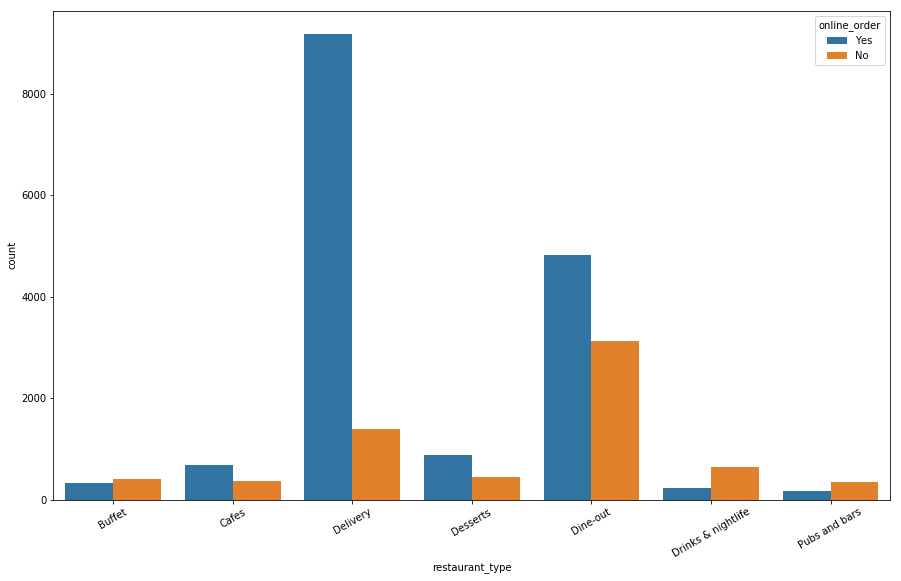

In [50]:
chart =sns.countplot(df2['restaurant_type'],hue=df2['online_order'])
chart.set_xticklabels(chart.get_xticklabels(),rotation=30)

In [51]:
pd.crosstab(df2['restaurant_type'],df2['online_order'])

online_order,No,Yes
restaurant_type,,
Buffet,418,335
Cafes,365,681
Delivery,1396,9179
Desserts,447,883
Dine-out,3134,4820
Drinks & nightlife,645,226
Pubs and bars,344,173


* Clearly, many places where delivery are available offer online order option.  

#### relation between online order/ table booking option and rating of the restaurant

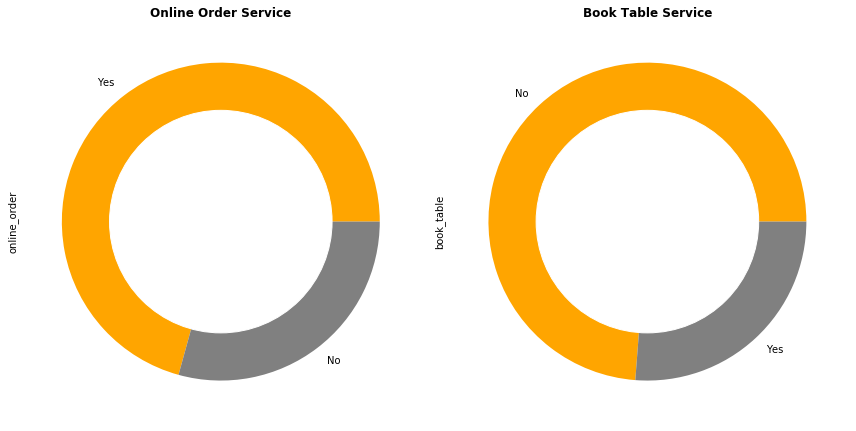

In [52]:
# plotting parameters
# set the color for the graph
colors = ['grey' for i in range(df2.location.nunique())]
colors[0] = 'orange'

plt.rcParams['figure.figsize'] = 12,6
plt.subplot(1, 2, 1)
df2.online_order.value_counts().plot('pie',colors=colors)

# add white circle to male donut plot
w_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(w_circle)
plt.title('Online Order Service',weight ='bold');

plt.subplot(1, 2, 2)
df2.book_table.value_counts().plot('pie',colors=colors)

# add white circle to male donut plot
w_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(w_circle)
plt.title('Book Table Service',weight ='bold')
plt.tight_layout();
plt.rcParams['figure.figsize'] = 8,6

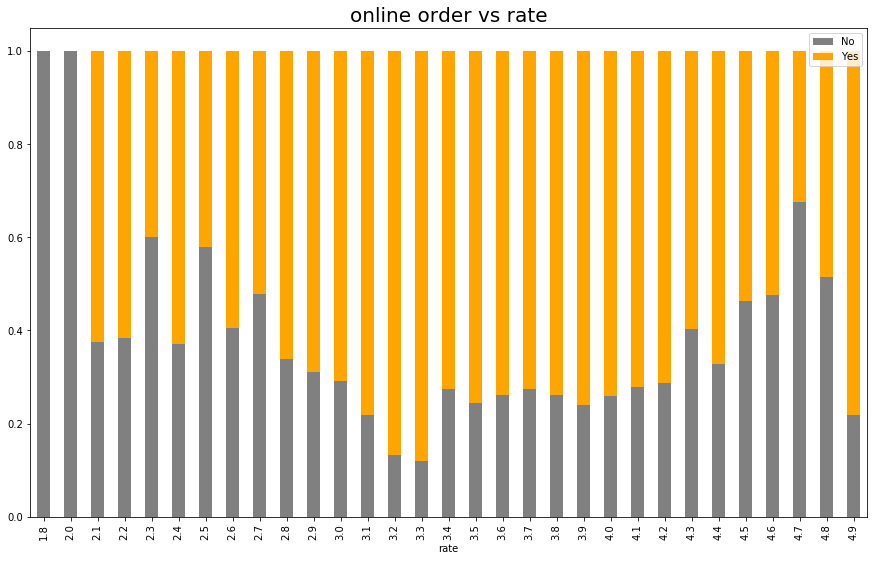

In [53]:
# X[['online_order','rate']].groupby(['rate']).sum(axis=0)
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(df2['rate'], df2['online_order'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['grey','orange'])
plt.title('online order vs rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

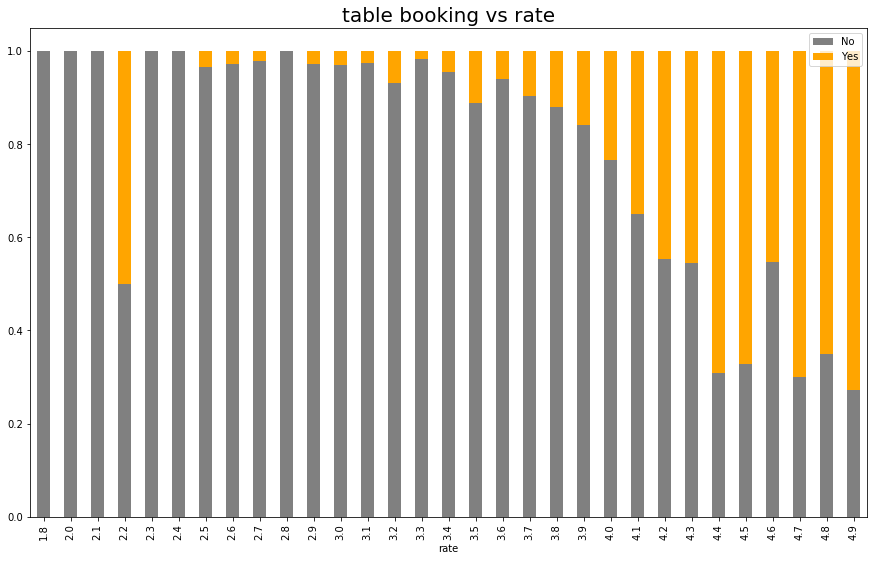

In [54]:
plt.rcParams['figure.figsize'] = (15, 9)
x = pd.crosstab(df2['rate'], df2['book_table'])
x.div(x.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['grey','orange'])
plt.title('table booking vs rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

* The restaurants offer online order option are more likely to receive a higher rating and many highly rated restaurants have the table booking option. 

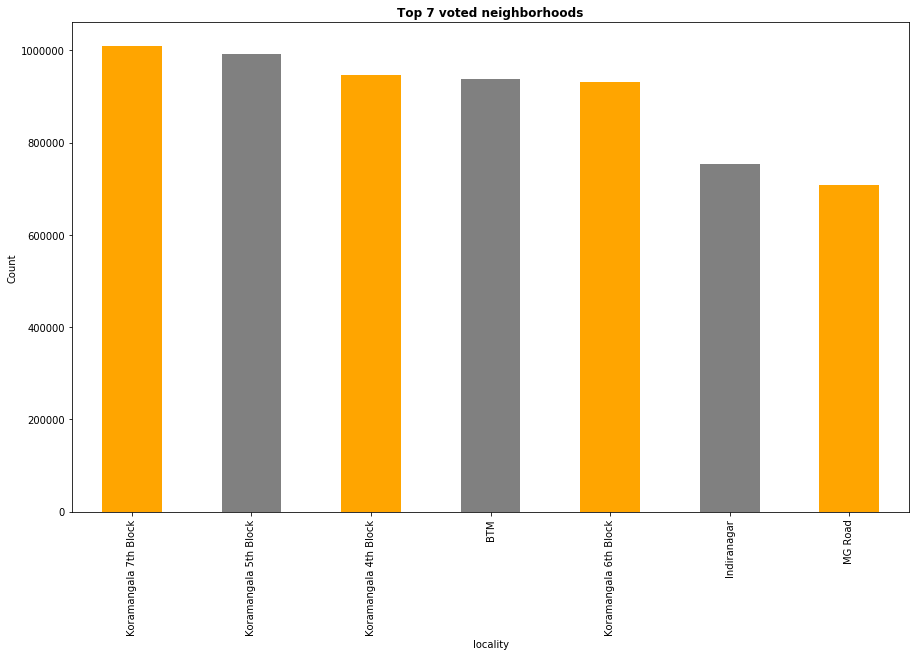

In [55]:
#correlation between different variables
df2.groupby('locality')['votes'].sum().sort_values(ascending=False)[:7].plot('bar',color=['orange','grey','orange','grey','orange','grey','orange'])
plt.title('Top 7 voted neighborhoods',weight='bold')
plt.ylabel('Count');

* People who live Koramangala are more likely to write reviews, which mean there is more power for word of mouth in that area.

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'average_cost',
       'reviews_list', 'menu_item', 'restaurant_type', 'locality'],
      dtype='object')

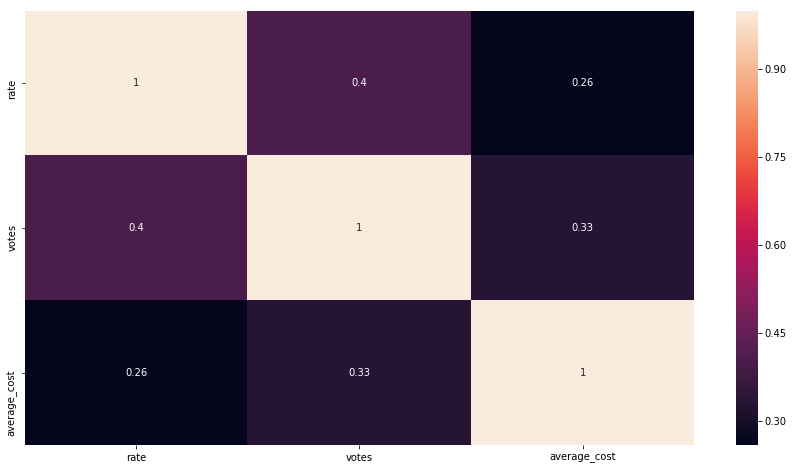

In [56]:
#correlation between different variables
corr = df2.corr(method='kendall')
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)
df2.columns

* The restaurant with more reviews is more likely to get higher rate 

### 3. Conclusion & Recommendation

Bengaluru is best place for foodies and BTM has the highest number of the restaurants. There are approximately 12,000 restaurants in Bengaluru. Because of high competition, it requires a careful approach for the restaurant business. Even though this industry hasn't been saturated yet, it has become difficult for newcomers to compete with already established restaurants.

Clearly, there's a high demand for the foods the most in BTM. It also means there's a high supply as well. Koramangala can be alternative option since it's a second highest foodie place in Bangalore and there is a room to penetrate the market while BTM seems too competitive. The analysis of the cuisines people like based on locations, people in Koramangala tend to go cafe-type restaurant compare to people in BTM. There is more competition in Koramangala 7th Block and Koramangala 5th Block while there are not much top restaurants in Koramangala 4th Block as much as 7th and 5th Block. Therefore, Koramangala 4th Block is a ideal location we can penetrate into market. Still, there's a high demand and people who live there are more likely to write reviews and rate it higher. 

The dishes people like at cafe are not only coffee and drinks but also snacks such as burgers, sandwiches, and pasta. It's good to position as a cafe-type restaurant which offers a variety of foods. The price range for cafe is between 550-1,300 INR and we aim for the price range about 800-1,250 INR like other top competitors. 

What we suggest for the differentiation from other competitors is not price or food, but the vibes. After investigating top restaurants in Bangalore, it came to the conclusion that cafe-type restaurant with beautiful restaurant architecture and interior design would work best. Considering the restaurant will attract people from BTM area as well since it only far away about 10 mins from Koramangala 4th Block, the restaurant can blend both side of elements in top casual dining and cafe. 

The Black Pearl is the most popular and highly rated restaurant in Koramangala, but people live here are more likely cafe-person. Byg Brewski Brewing Company, the highest rated restaurant in Bangalore, would be good one to benchmark. Unlikely AB's - Absolute Barbecues and The Black Pearl, Byg Brewski Brewing Company more focus on unique ambience that many women would like. In fact, many reviews (especially from women) mention about its beautiful landscape and interior design. This place also have a cafe-like vibe so it would definitely attract people who like to go cafes.

### Works Cited

    * https://en.wikipedia.org/wiki/Culture_of_Bangalore
    * http://www.brewchew.in/
    * http://www.uppercrustindia.com/posts/212/Bangalore-A-Culinary-Landscape.html
    * https://www.smergers.com/businesses/fast-food-restaurants-for-sale-and-investment-opportunities-in-bangalore/s412/c1/t0/?page=2
    * https://www.rediff.com/money/2006/sep/07rest.htm
    * https://www.posist.com/restaurant-times/resources/complete-guide-opening-restaurant.html